##### Testing the Hypothesis 1
## Student Performace based on their screen time

- **Target Variables (Dependent Variables)**
  - *School Grade* :  Categorial
  - *Academic performance* : numerical (int)
  
- **Feature Variables (or Indepencdent Variables)**
  - Sleep_Hours
  - Screen_Time_Before_Bed
  - Time_on_Social_Media
  - Time_on_Gaming
  - Time_on_Education
  - Weekend_Usuage_Hours


In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score


In [2]:
df = pd.read_csv('Projects/teen_phone_addiction/teen_phone_addiction_dataset.csv')

In [3]:
nf = df[[ 'Daily_Usage_Hours','Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education','Weekend_Usage_Hours','Academic_Performance']]
print(nf)

      Daily_Usage_Hours  Screen_Time_Before_Bed  Time_on_Social_Media  \
0                   4.0                     1.4                   3.6   
1                   5.5                     0.9                   1.1   
2                   5.8                     0.5                   0.3   
3                   3.1                     1.4                   3.1   
4                   2.5                     1.0                   2.6   
...                 ...                     ...                   ...   
2995                3.9                     0.3                   2.7   
2996                3.6                     0.9                   3.1   
2997                3.2                     0.2                   2.4   
2998                6.7                     1.6                   1.7   
2999                3.5                     0.6                   0.0   

      Time_on_Gaming  Time_on_Education  Weekend_Usage_Hours  \
0                1.7                1.2                  8.

In [4]:
# Featue selection using Correlation
correlation_matrix  = nf.corr()

<Axes: >

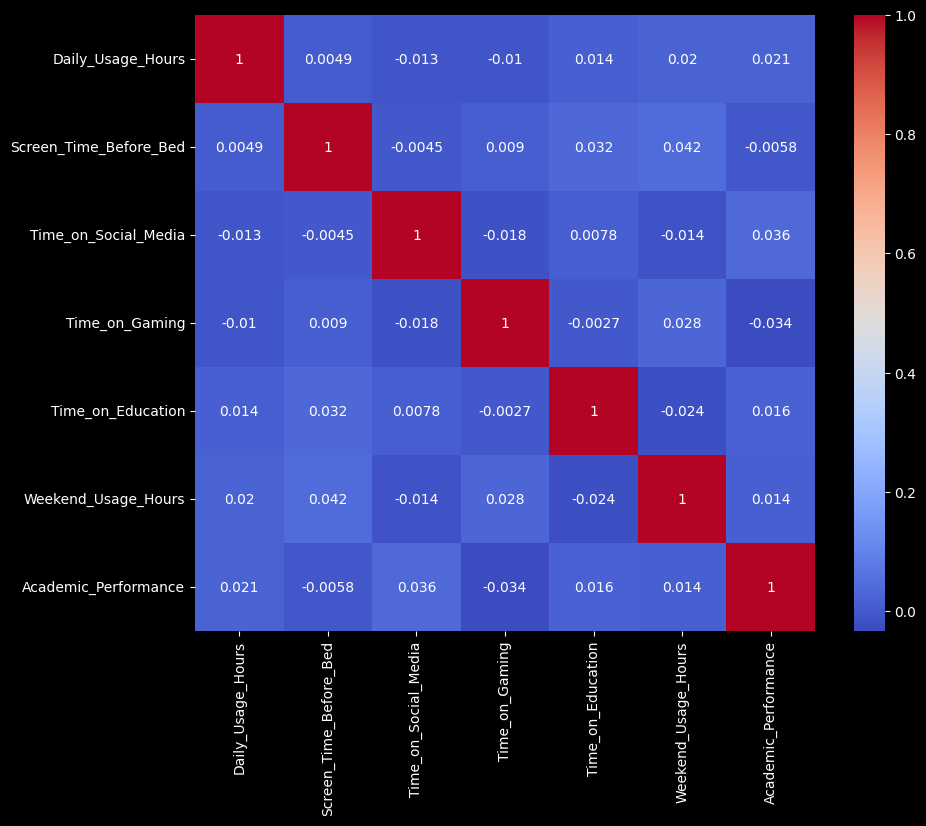

In [5]:
# Plot Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

Text(0, 0.5, 'Academic Performance')

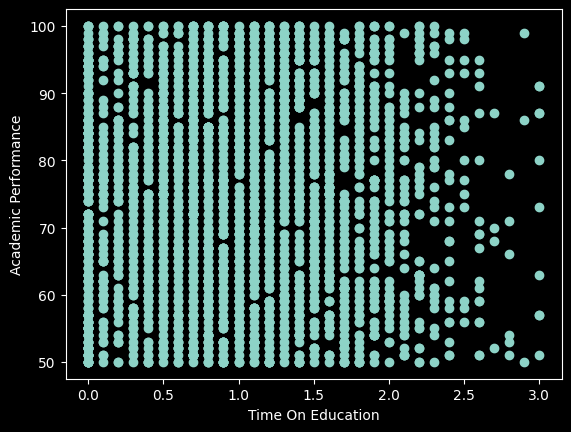

In [6]:
plt.scatter(nf[['Time_on_Education']],nf[['Academic_Performance']])
plt.xlabel("Time On Education")
plt.ylabel("Academic Performance")

---

### Prediction of Academic Performance w.r.t
- Daily_Usage_Hours
- Sleep_Hours
- Screen_Time_Before_Bed
- Time_on_Social_Media
- Time_on_Gaming
- Time_on_Education
- Weekend_Usage_Hours


In [7]:
X = nf.drop(columns=['Academic_Performance'])
y = df['Academic_Performance']

#### Without Featuer Enginnring

In [8]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# Linear Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)
y_pred_reg = regression_model.predict(X_test)
accuracy1 = mean_squared_error(y_test, y_pred_reg)
r2_regression = r2_score(y_test, y_pred_reg)
print("R2_Score:",r2_regression)
print("Accuracy With Simple Regression Model:",accuracy1)

# K-NN Model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy2 = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("R2_Score:",r2_knn)
print("Accuracy With kNN Model:",accuracy2)



R2_Score: -0.007270486680555743
Accuracy With Simple Regression Model: 226.80863716930006
R2_Score: -0.17676984302991405
Accuracy With kNN Model: 264.97506666666663


### Feature Enginning

MinMax Scaling

In [9]:
# Applying Min-Max Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
print("MIN-MAX Scaling")
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=42)
# Linear Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)
y_pred_reg = regression_model.predict(X_test)
accuracy3 = mean_squared_error(y_test, y_pred_reg)
print("Accuracy With Simple Regression Model:",accuracy3)

# K-NN Model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy4 = mean_squared_error(y_test, y_pred_knn)
print("Accuracy With kNN Model:",accuracy4)

MIN-MAX Scaling
Accuracy With Simple Regression Model: 226.80863716930006
Accuracy With kNN Model: 263.6454


Standardizaton

In [11]:
# Standardization
scaler = StandardScaler()
X_ss = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_ss,y, test_size=0.2, random_state=42)

print("StandardScaler")

# Linear Regression Model
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)
y_pred_reg = regression_model.predict(X_test)
accuracy5 = mean_squared_error(y_test, y_pred_reg)
print("Accuracy With Simple Regression Model:",accuracy5)

# K-NN Model
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy6 = mean_squared_error(y_test, y_pred_knn)
print("Accuracy With kNN Model:",accuracy6)



StandardScaler
Accuracy With Simple Regression Model: 226.80863716930006
Accuracy With kNN Model: 262.09920000000005
